In [ ]:
openai_api_key = 'Your-OpenAI-API-Key-Here'
model_name = 'gpt-4o-mini' 

In [12]:
import openai
import copy
import numpy as np
import os
import sys
import ast
import astunparse
from pygments import highlight
from pygments.lexers import PythonLexer
from pygments.formatters import TerminalFormatter
import heapq
import base64
from localization import build_msg_localizer
from QA_agent import MultiviewSceneGraph, setup_LMP, cfg_tabletop, LMP_wrapper

video_id = "20250424"
msg_file_path = "/home/cl6933/MSG/GDoutputs/real"

os.environ["OPENAI_API_KEY"] = openai_api_key
client = openai.OpenAI()

In [19]:
env = MultiviewSceneGraph(video_id, msg_file_path)
lmp_tabletop_ui = setup_LMP(env, cfg_tabletop)

#Example questions for the agent to answer
#question = "How many frames are there."
question = "what kind of objects are there in the frame number 000010 and also give me the quantities"
#question = "show me where are the tables."
#question = "Where can I put my laptop."
#question = "I am tired where can I go to sleep"
#question = "I’m in place 'start', how can I go to 'goal'?"
#question = "Find frame numbers nearby 3044.722."
##question = "what do we have in this space"
#question = "are the tables in frame 3044.239 and frame 3105.730 the same?"
#question = "are the tables in frame 3044.239 and frame 3044.722 the same?"
#question = "does the table in frame number: 3044.239 appear in other frames?"
#question = "does the tv in frame number: 3127.721 appear in other frames?"
#question = "is there any book in this space?"
#question = "How many tv are there."
#question = "What's the color of the cabinet in picture 3123.722?"
#question = "What's the shape of the table in picture 3044.239?"

user_input = question #@param {allow-input: true, type:"string"}

box_matcher No param
obj_embedder frozen
place_embedder frozen


In [20]:
lmp_tabletop_ui(user_input, f'')

LMP tabletop_ui exec:

# what kind of objects are there in the frame number 000010 and also give me the quantities.
objects = get_object_from_frame("000010")
object_quantities = count_objects(objects)
say(f'The objects in frame 000010 are: {object_quantities}')




KeyError: 'annotations'

QA_agent log
1. "Added object comparison for specific video frames"
2. "Added command to check whether object appearance in specific frames"
3. "Added `issimilar` function for fuzzy object name matching"
4. "Added VLM access."
5. "Added localization function."

In [5]:
from QA_agent import MultiviewSceneGraph, setup_LMP, cfg_tabletop, LMP_wrapper

import random
import re

def get_random_video_id():
    folder_path = "/home/cl6933/MSG/exp-results/aomsg/2024-05-14_22-26-52/Test"
    files = [f for f in os.listdir(folder_path)]
    return random.sample(files, 1)


def get_random_frame_names(frame_number):
    folder_path = "/mnt/NAS/data/jz4725/msgdata/Test/" + frame_number + "/" + frame_number + "_frames/lowres_wide"
    files = [f for f in os.listdir(folder_path)
             if f.endswith('.png') and '_' in f and os.path.isfile(os.path.join(folder_path, f))]
    
    selected_files = random.sample(files, 2)
    result_list = []
    
    pattern = re.compile(r'_(.*)\.png$')
    
    for file in selected_files:
        match = pattern.search(file)
        if match:
            substring = match.group(1)
            result_list.append(substring)
    return result_list


box_matcher No param
obj_embedder frozen
place_embedder frozen
video_id:  41159566
pp_iou:  0.279624034911044
['35422.921', '35323.410', '35418.922']


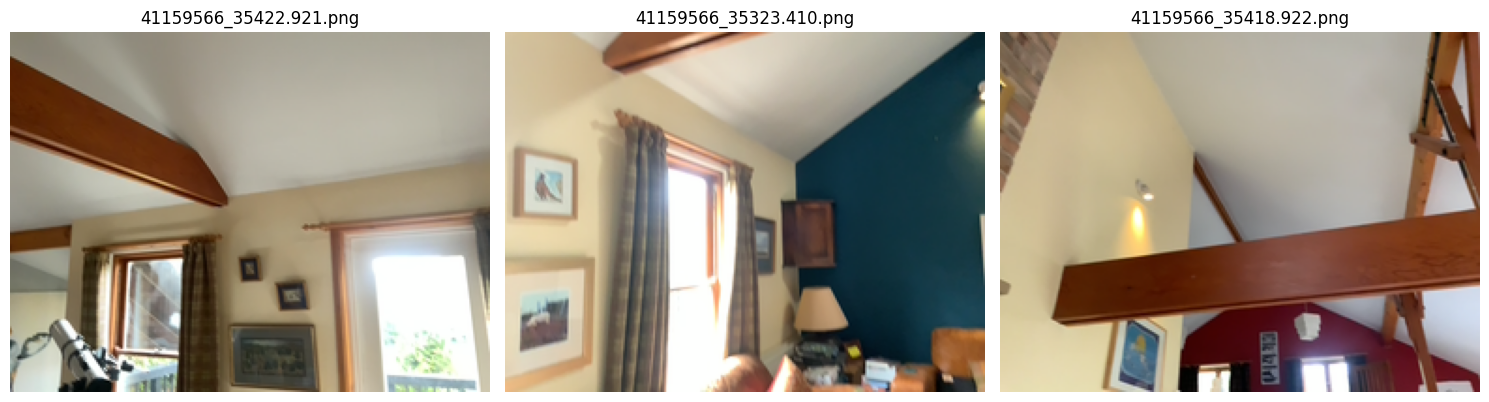

box_matcher No param
obj_embedder frozen
place_embedder frozen
video_id:  41254262
pp_iou:  0.3373642645607108
['101765.308', '101828.798', '101881.793', '101824.300']


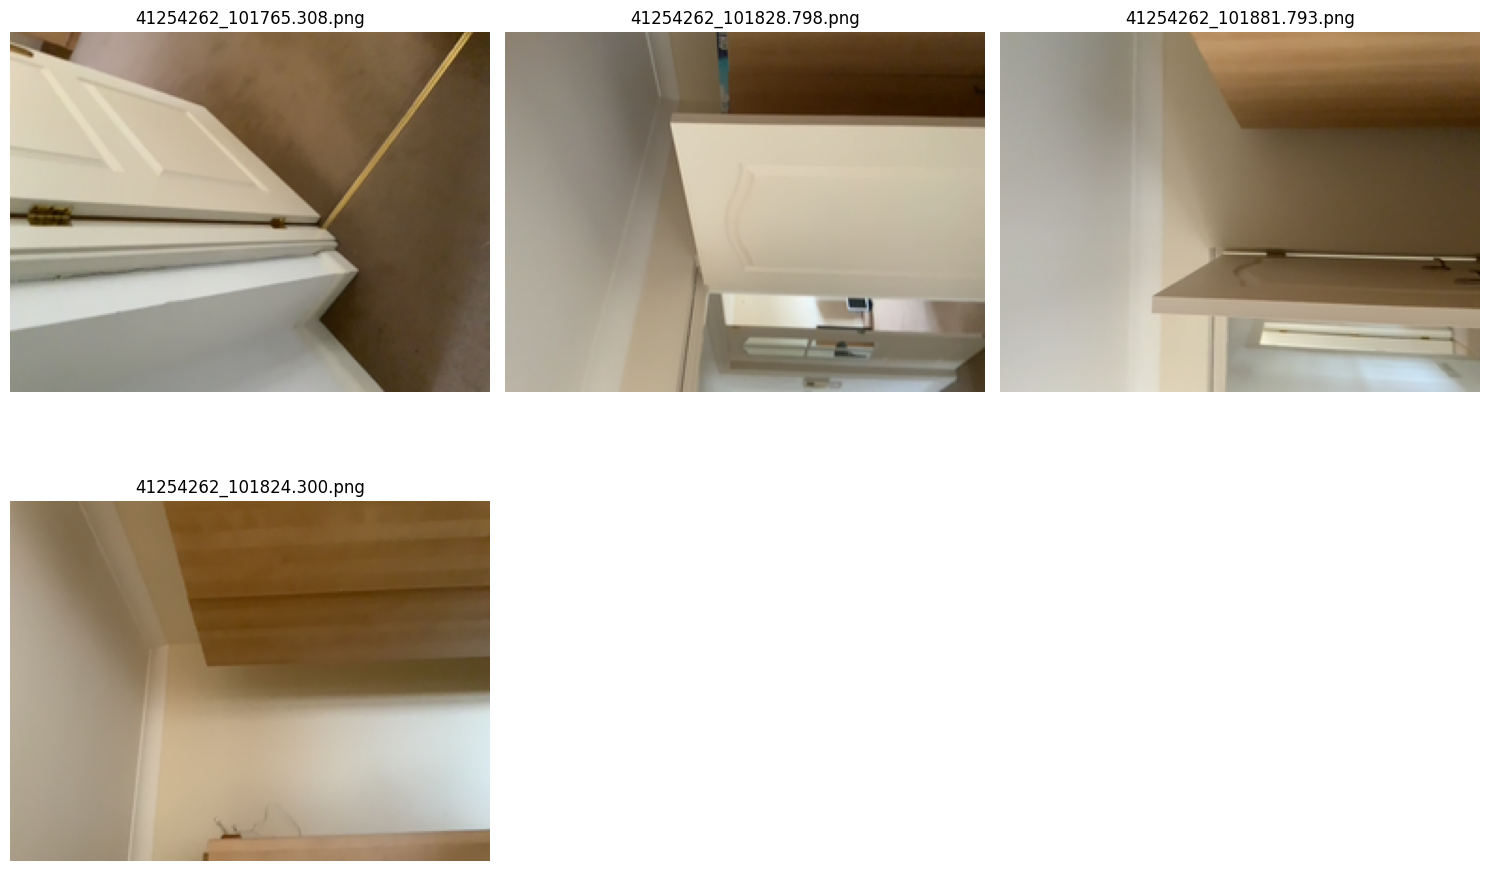

box_matcher No param
obj_embedder frozen
place_embedder frozen
video_id:  41159540
pp_iou:  0.299182848607328
['39883.831', '39990.819']


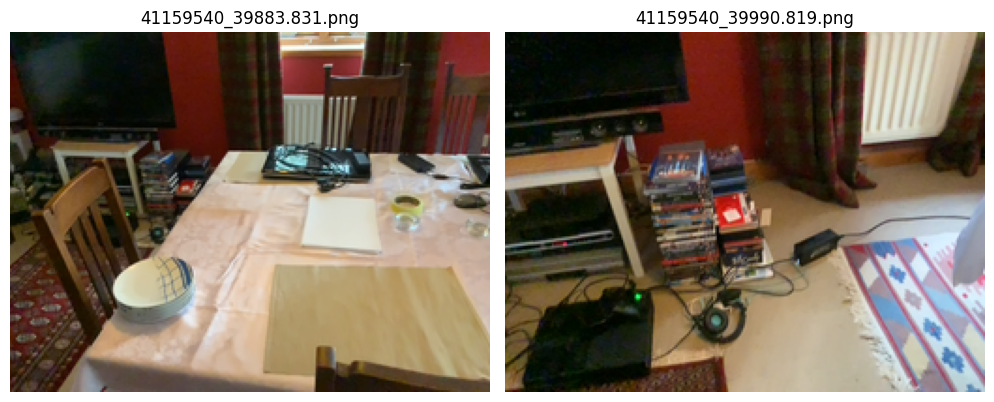

box_matcher No param
obj_embedder frozen
place_embedder frozen
video_id:  42446083
pp_iou:  0.466644919262763
['348839.979', '348841.479', '348855.989', '348911.483', '348892.991']


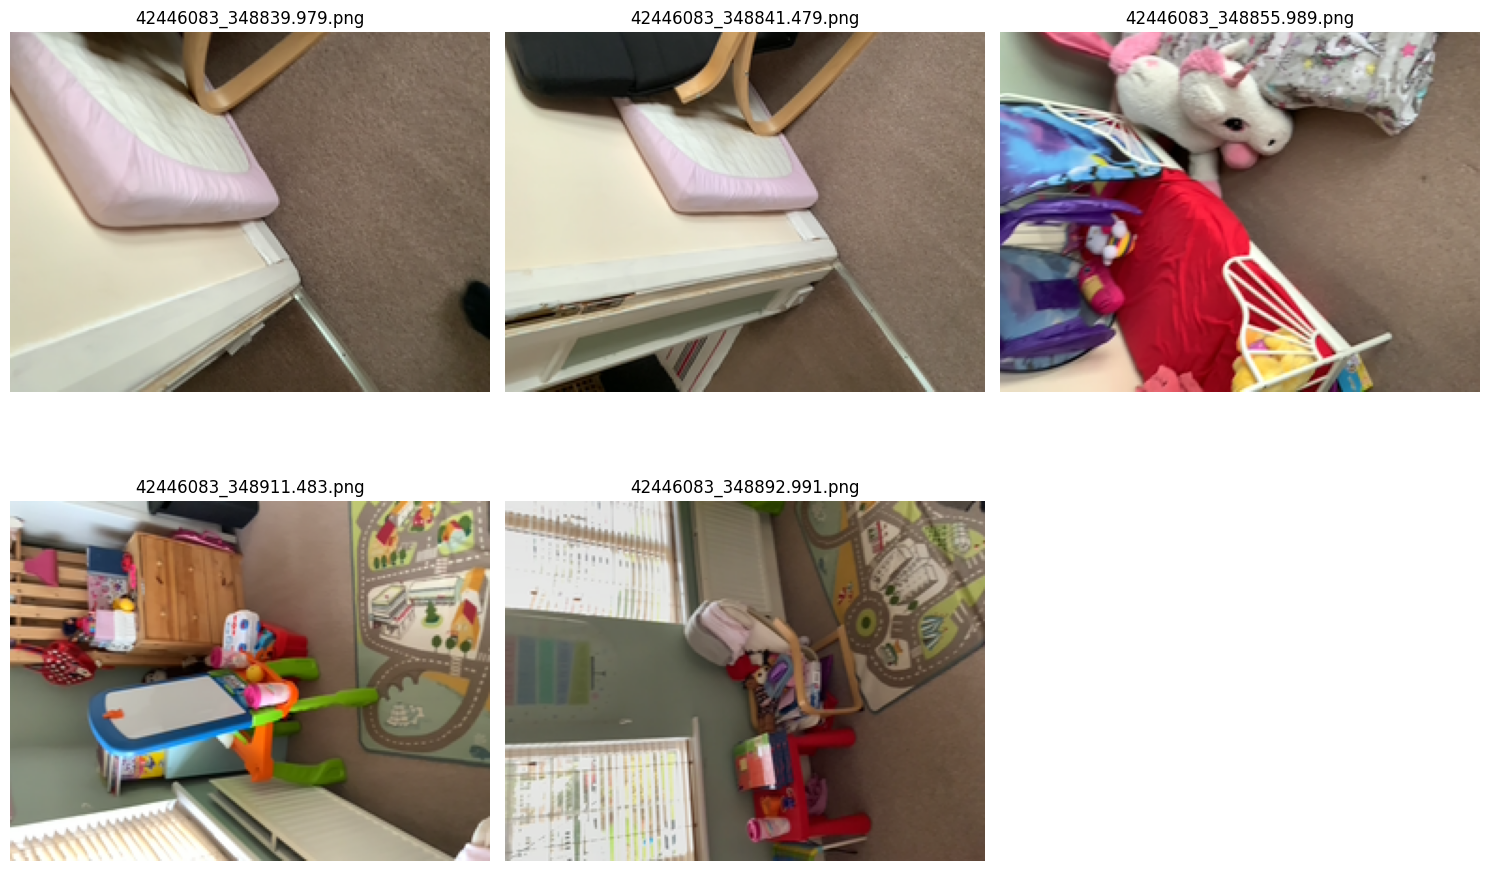

box_matcher No param
obj_embedder frozen
place_embedder frozen
video_id:  41069025
pp_iou:  0.3305723822474966
['715.859', '708.862', '750.361', '599.357', '590.360']


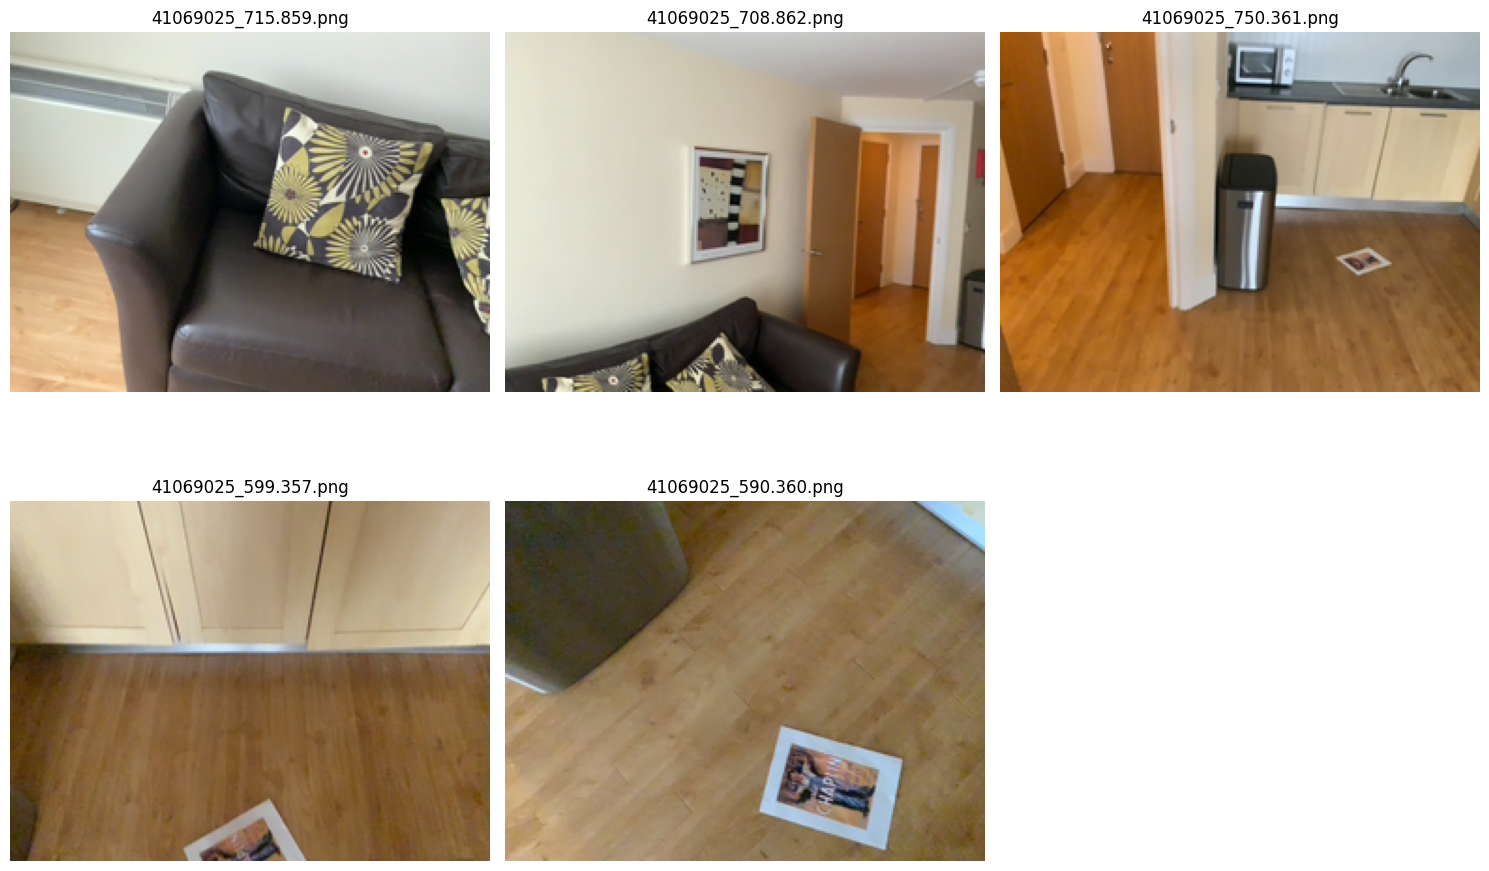

box_matcher No param
obj_embedder frozen
place_embedder frozen
video_id:  41125731
pp_iou:  0.3266060261512223
['4613.222', '4643.926', '4622.418', '4666.917']


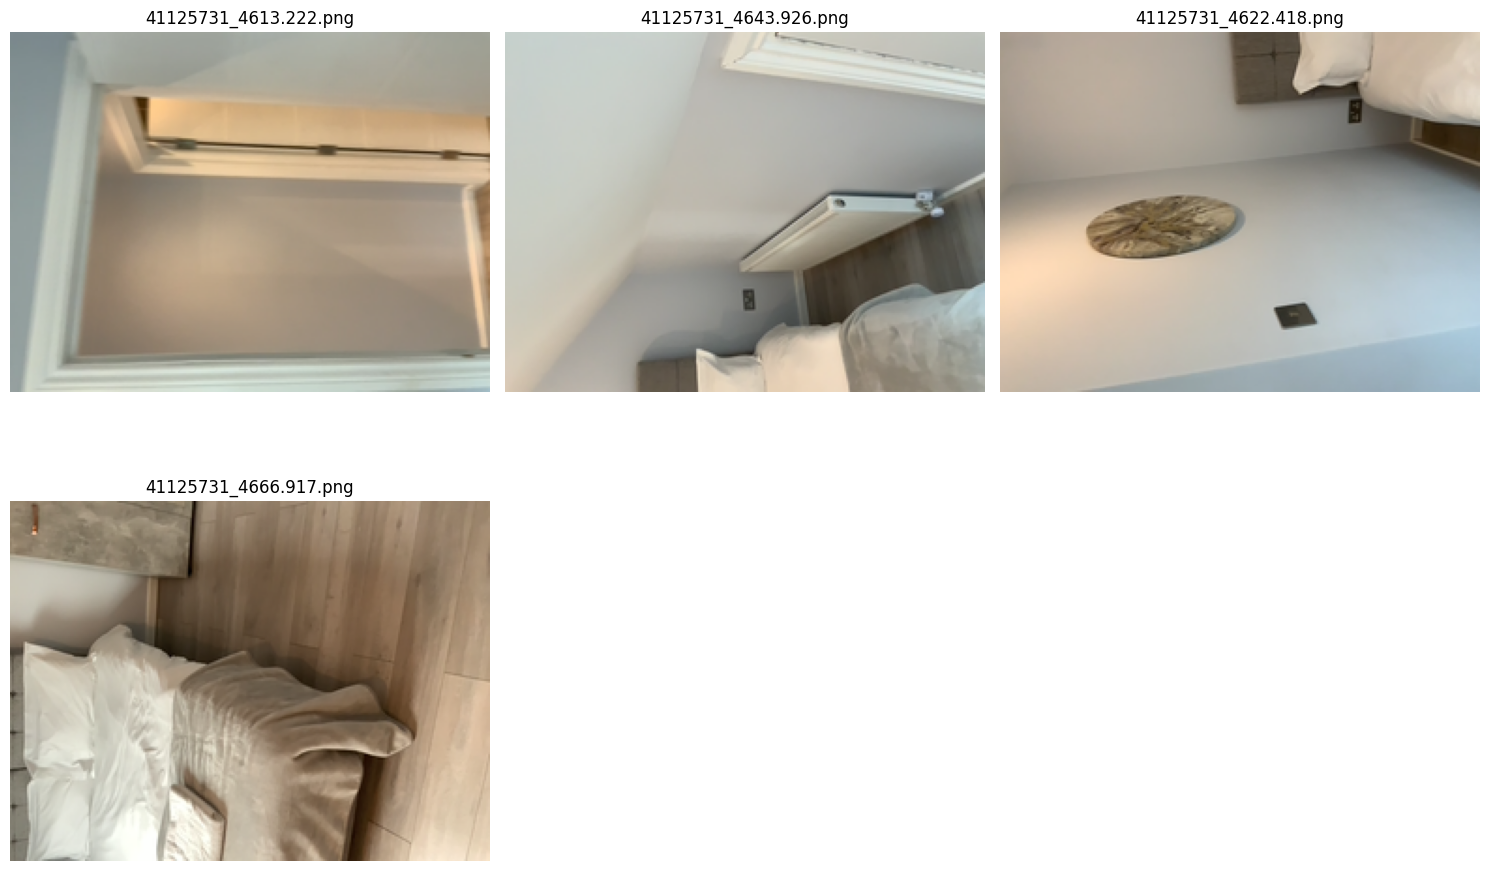

box_matcher No param
obj_embedder frozen
place_embedder frozen
video_id:  41254398
pp_iou:  0.42658655651520844
['95030.560', '94961.571', '94997.573', '95017.565']


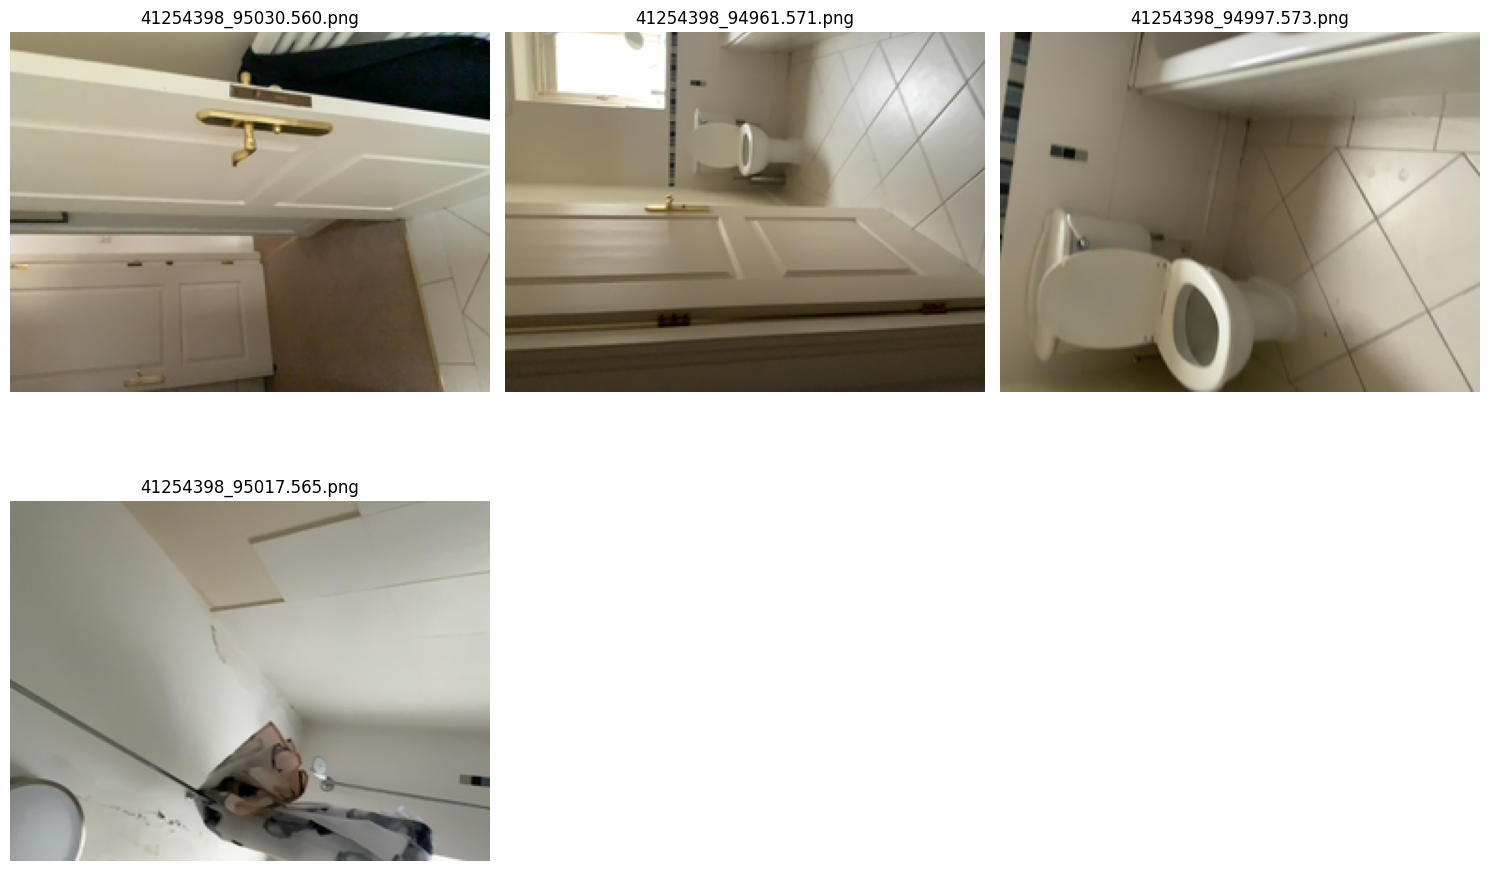

box_matcher No param
obj_embedder frozen
place_embedder frozen
video_id:  41125722
pp_iou:  0.3437387224828582
['4543.017', '4534.521', '4596.029', '4602.526', '4604.026']


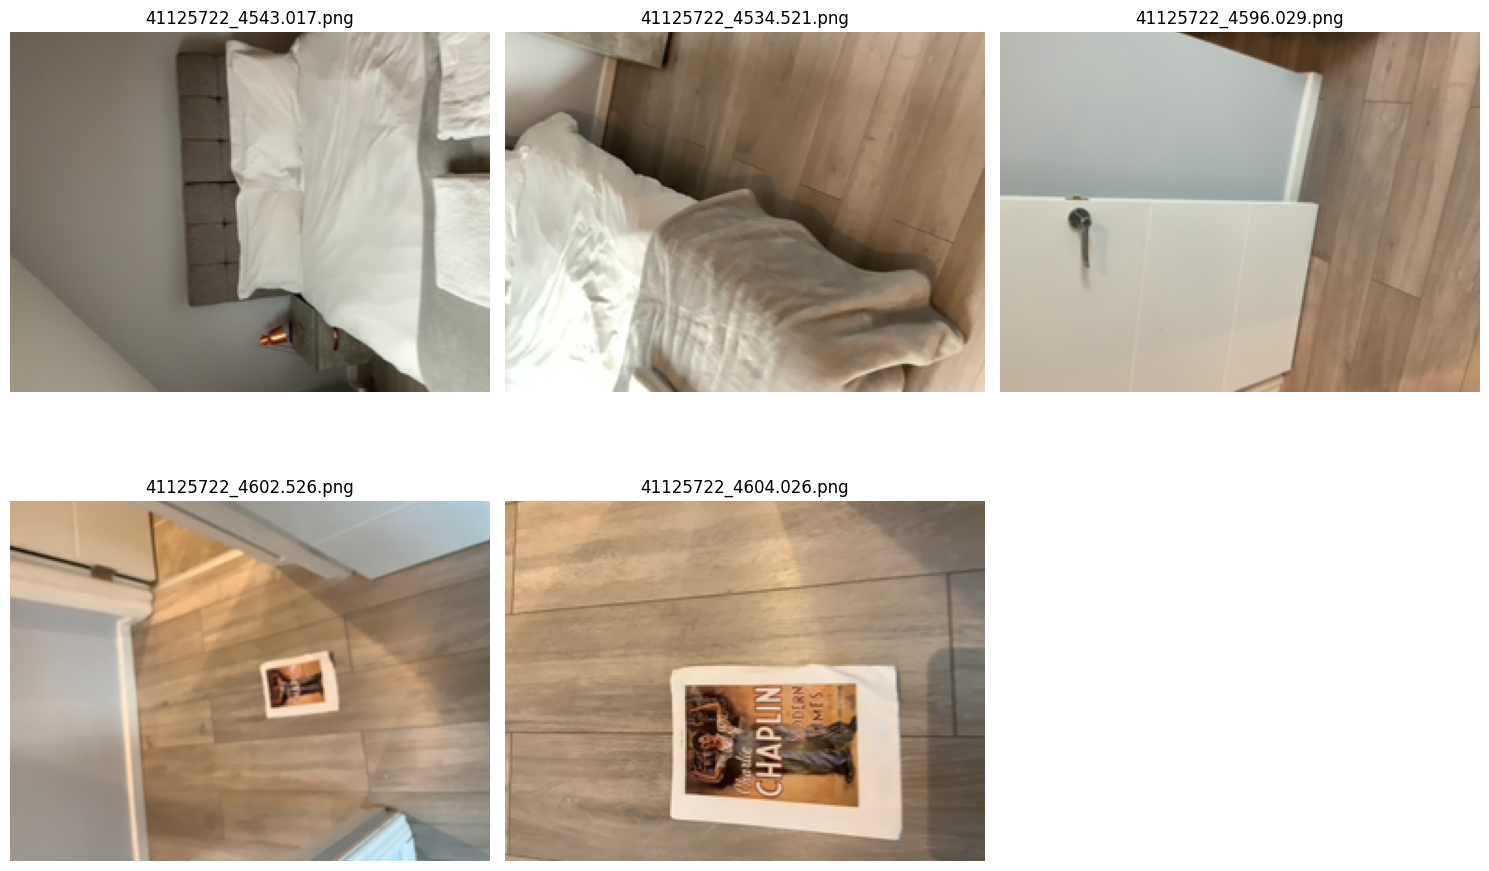

box_matcher No param
obj_embedder frozen
place_embedder frozen
video_id:  41069043
pp_iou:  0.33001571503404925
['2884.638', '2884.138', '2811.135']


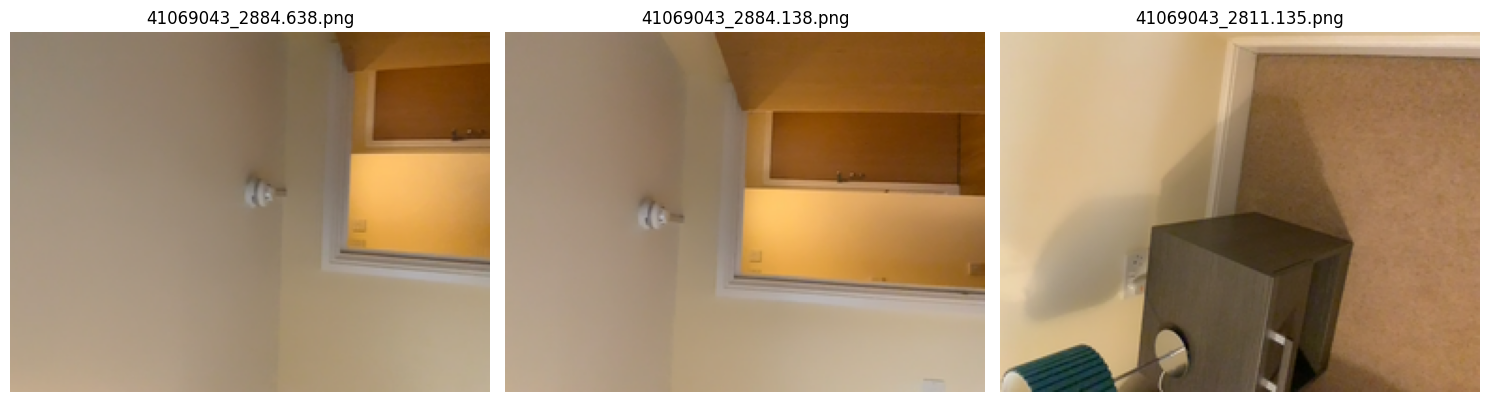

box_matcher No param
obj_embedder frozen
place_embedder frozen
video_id:  42446093
pp_iou:  0.28748669043099856
['350184.861', '350253.866', '350270.359', '350152.874']


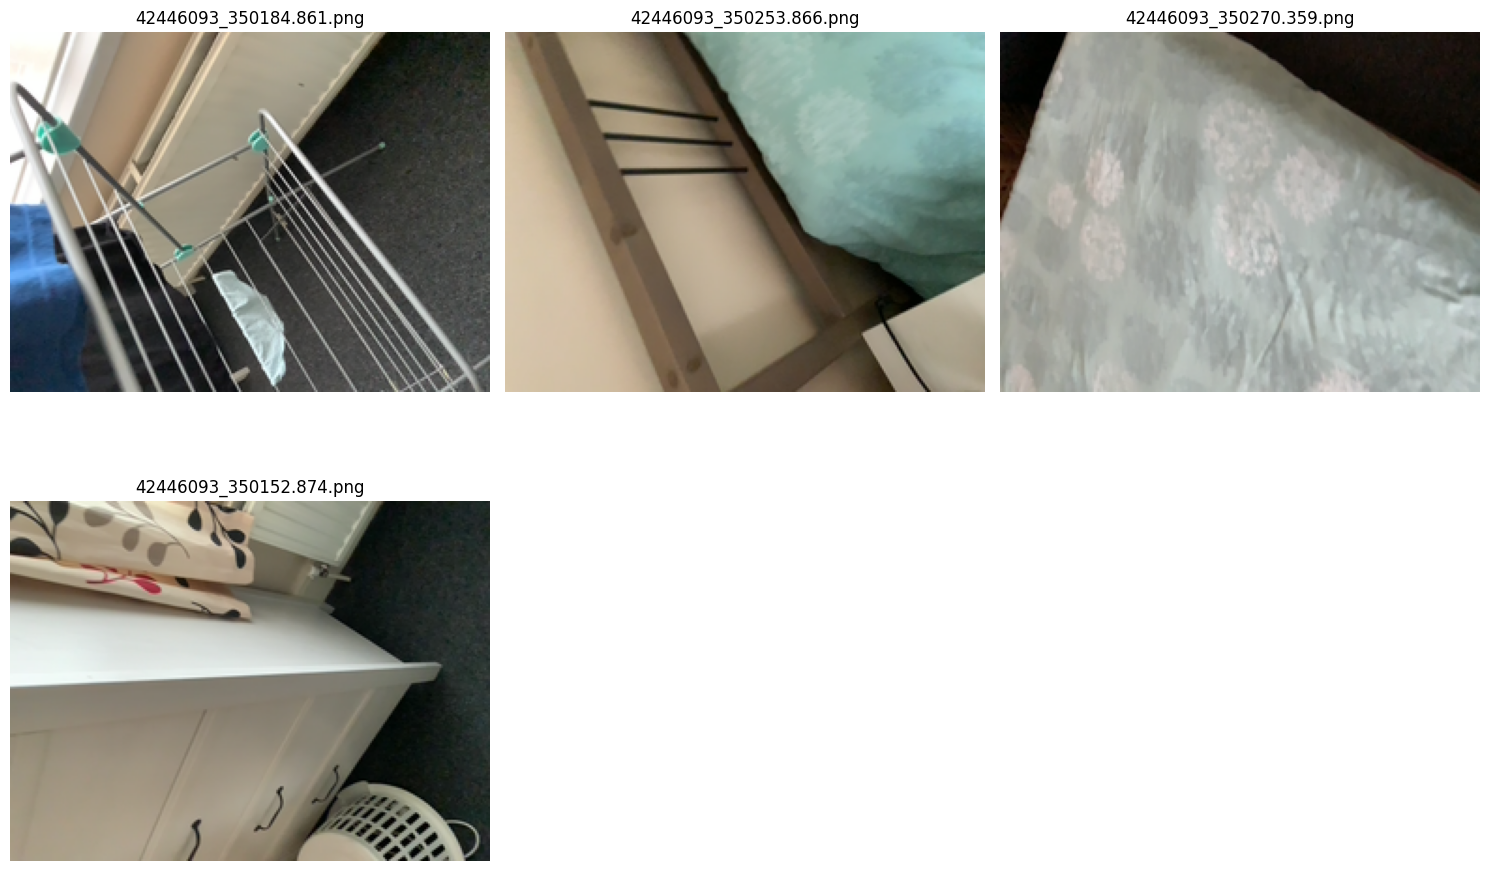

In [6]:
for _ in range(10):
    video_id = get_random_video_id()[0]
    start_end = get_random_frame_names(video_id)
    
    env = MultiviewSceneGraph(video_id, msg_file_path)
    test_env = LMP_wrapper(env, cfg_tabletop)
    print("video_id: ", video_id)
    print("pp_iou: ", env.json_data["eval_metrics"]["pp_iou"])
    path = test_env.shortest_path(env.get_frame2index(start_end[0]), env.get_frame2index(start_end[1]))
    frame_path = [env.get_index2frame(i) for i in path]
    print(frame_path)
    test_env.show_images_from_frames(frame_path)

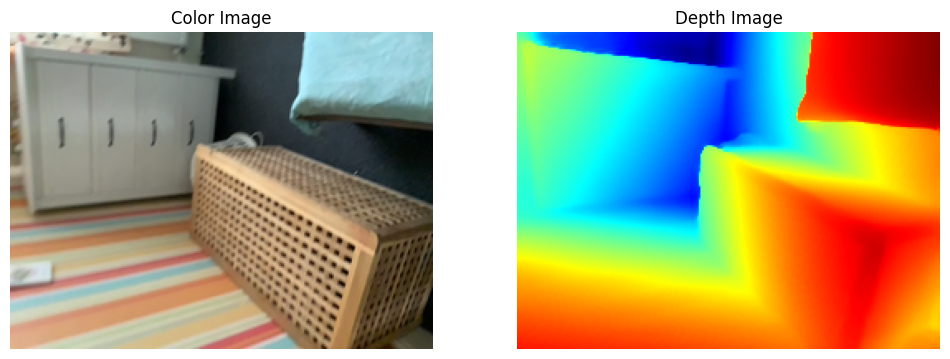

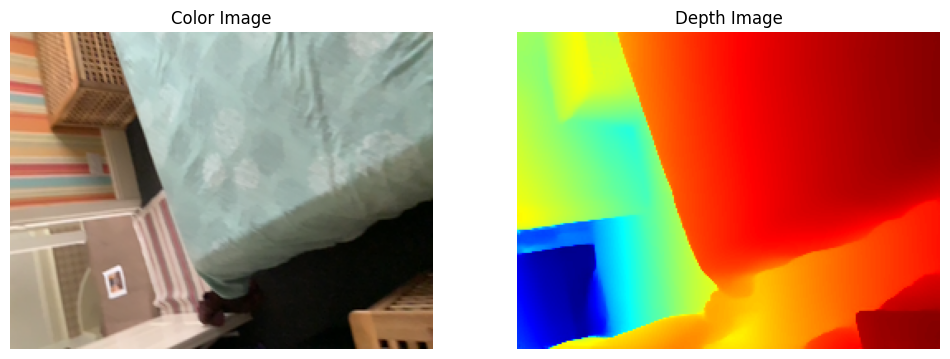

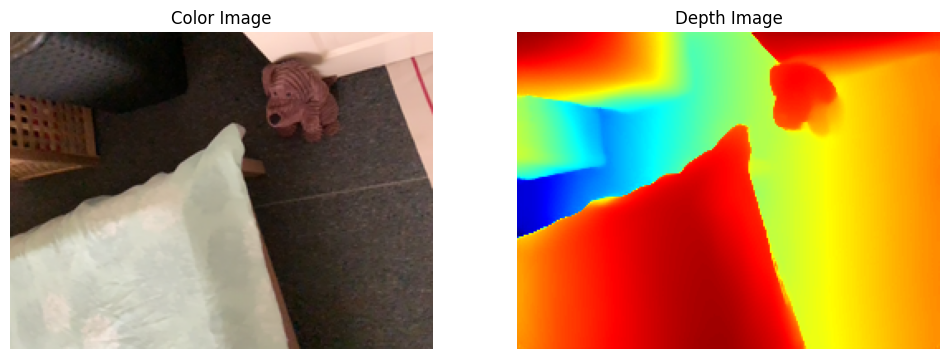

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the depth and color images
video_ids = ['350030.474', '350024.960', '349993.473']

for video_id in video_ids:
    depth_image_path = "/mnt/NAS/data/jz4725/ARKitData/3dod/Validation/42446116/42446116_frames/lowres_depth/42446116_" + video_id + ".png"
    color_image_path = "/mnt/NAS/data/jz4725/ARKitData/3dod/Validation/42446116/42446116_frames/lowres_wide/42446116_" + video_id + ".png"
    
    depth_image = cv2.imread(depth_image_path, cv2.IMREAD_ANYDEPTH)
    color_image = cv2.imread(color_image_path, cv2.IMREAD_COLOR)
    
    # Check if images were loaded successfully
    if depth_image is None or color_image is None:
        print("Error: Could not open or find one of the images.")
    else:
        # Normalize the depth image to a range between 0 and 255 for visualization
        normalized_depth_image = cv2.normalize(depth_image, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
        
        # Apply a colormap for better visualization
        colored_depth_image = cv2.applyColorMap(normalized_depth_image, cv2.COLORMAP_JET)
        
        # Convert color image from BGR to RGB for correct display in matplotlib
        color_image_rgb = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)
        
        # Plot both images side by side
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        
        axes[0].imshow(color_image_rgb)
        axes[0].set_title("Color Image")
        axes[0].axis("off")
        
        axes[1].imshow(colored_depth_image)
        axes[1].set_title("Depth Image")
        axes[1].axis("off")
        
        plt.show()

In [ ]:
"000329": {"1": {"bbox": [349, 0, 500, 55], "label": 3, "score": 1.0, "uniq": "tv:1"}, 
           "5": {"bbox": [172, 70, 392, 349], "label": 2, "score": 1.0, "uniq": "table:1"}},